In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('AfterEngineeringFeatures_StrokesDataset.csv')

In [3]:
dataset

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_into_age,work_type_Never_worked,...,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_disease
0,0,9046,1.051434,0,1,2.706375,1.044503,1,1.506152,0,...,0,0,1,0,1,1,1,0,0,0
1,1,51676,0.786070,0,0,2.121559,0.027170,1,0.537899,0,...,1,0,0,0,1,0,0,1,0,0
2,2,31112,1.626390,0,1,-0.005028,0.587154,1,1.700039,0,...,0,0,1,0,1,0,0,1,0,0
3,3,60182,0.255342,0,0,1.437358,0.805868,1,0.500512,0,...,0,0,0,0,1,1,0,0,1,0
4,4,1665,1.582163,1,0,1.501184,-0.579952,1,0.776519,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,1.626390,1,0,-0.494658,0.027170,0,1.238279,0,...,0,0,0,0,1,1,0,1,0,0
5106,5106,44873,1.670617,0,0,0.420775,1.386456,0,2.539602,0,...,1,0,0,0,1,1,0,1,0,0
5107,5107,19723,-0.363842,0,0,-0.511443,0.355262,0,-0.305731,0,...,1,0,0,0,1,0,0,1,0,0
5108,5108,37544,0.343796,0,0,1.328257,-0.331513,0,0.002021,0,...,0,0,1,0,1,0,1,0,0,0


In [4]:
dataset.columns[0]

'Unnamed: 0'

In [5]:
dataset.drop([dataset.columns[0],"id"],axis=1,inplace=True)

In [6]:
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_into_age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_disease
0,1.051434,0,1,2.706375,1.044503,1,1.506152,0,1,0,0,1,0,1,1,1,0,0,0
1,0.786070,0,0,2.121559,0.027170,1,0.537899,0,0,1,0,0,0,1,0,0,1,0,0
2,1.626390,0,1,-0.005028,0.587154,1,1.700039,0,1,0,0,1,0,1,0,0,1,0,0
3,0.255342,0,0,1.437358,0.805868,1,0.500512,0,1,0,0,0,0,1,1,0,0,1,0
4,1.582163,1,0,1.501184,-0.579952,1,0.776519,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,0.027170,0,1.238279,0,1,0,0,0,0,1,1,0,1,0,0
5106,1.670617,0,0,0.420775,1.386456,0,2.539602,0,0,1,0,0,0,1,1,0,1,0,0
5107,-0.363842,0,0,-0.511443,0.355262,0,-0.305731,0,0,1,0,0,0,1,0,0,1,0,0
5108,0.343796,0,0,1.328257,-0.331513,0,0.002021,0,1,0,0,1,0,1,0,1,0,0,0


### Feature Selection by finding out which features are best suited for our dataset using select k best classifier 

In [7]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(score_func=f_classif)
fits = selector.fit(dataset.drop("stroke",axis=1),dataset["stroke"])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(dataset.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,326.916568
5,bmi_into_age,240.513721
2,heart_disease,94.698406
3,avg_glucose_level,90.503870
1,hypertension,84.953542
12,ever_married_Yes,60.667230
9,work_type_children,36.184470
17,hypertension_heart_disease,33.536698
14,smoking_status_formerly smoked,21.376277
8,work_type_Self-employed,19.818466


In [8]:
columns = fscores["Attribute"]

In [9]:
np.array(fscores["Score"])

array([3.26916568e+02, 8.49535422e+01, 9.46984060e+01, 9.05038696e+01,
       1.30692570e+01, 2.40513721e+02, 1.13160900e+00, 7.22016373e-01,
       1.98184657e+01, 3.61844703e+01, 4.24625013e-01, 5.12145152e-02,
       6.06672297e+01, 1.22084166e+00, 2.13762771e+01, 8.70727771e-02,
       4.08209600e-01, 3.35366982e+01])

In [11]:
fscores.transpose().drop("Attribute").iloc[0]

0     326.916568
1      84.953542
2      94.698406
3       90.50387
4      13.069257
5     240.513721
6       1.131609
7       0.722016
8      19.818466
9       36.18447
10      0.424625
11      0.051215
12      60.66723
13      1.220842
14     21.376277
15      0.087073
16       0.40821
17     33.536698
Name: Score, dtype: object

In [12]:
columns

0                                age
1                       hypertension
2                      heart_disease
3                  avg_glucose_level
4                                bmi
5                       bmi_into_age
6             work_type_Never_worked
7                  work_type_Private
8            work_type_Self-employed
9                 work_type_children
10                       gender_Male
11                      gender_Other
12                  ever_married_Yes
13              Residence_type_Urban
14    smoking_status_formerly smoked
15       smoking_status_never smoked
16             smoking_status_smokes
17        hypertension_heart_disease
Name: Attribute, dtype: object

In [13]:
col = list(columns)

In [90]:
col

['avg_glucose_level',
 'bmi_into_age',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'hypertension_heart_disease']

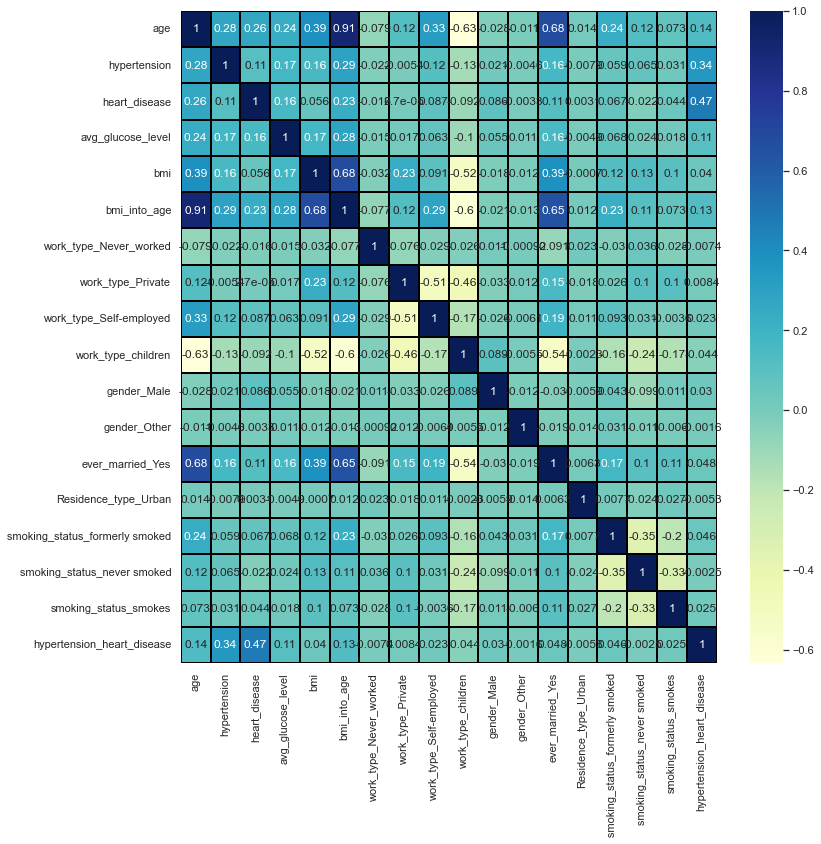

In [18]:
sns.heatmap(dataset[col].corr(),cmap="YlGnBu",linecolor="black",linewidths=2,annot=True)
sns.set(rc={'figure.figsize':(12,12)})

### As in the above correlation heatmap the feature age and bmi into age is highly correlated leading to multicolinearity in our dataset so we have to remove age feature for decreasing multicolinearity 

In [19]:
col.remove("age")

In [20]:
data = dataset[col]

In [21]:
target = dataset["stroke"]

In [22]:
target

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

### SMOTE is a machine learning technique that solves problems that occur when using an imbalanced data set. Our dataset is highly imbalanced 

In [23]:
import imblearn

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE()
data,target = smote.fit_resample(data,target)

### Splitting our dataset into train test and validation sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
    test_size=0.2, shuffle = True, random_state = 8)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.25,random_state=8)


In [28]:
X_train

,hypertension,heart_disease,avg_glucose_level,bmi,bmi_into_age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_disease
3328,0,1,-0.933933,0.214334,1.075613,0,0,1,0,1,0,1,1,0,0,1,0
7181,0,0,-0.015422,0.027170,0.881492,0,0,1,0,0,0,0,1,0,0,0,0
9661,0,0,-1.038319,-0.098765,1.074913,0,0,1,0,0,0,1,0,1,0,0,0
4430,1,0,-0.009445,0.161780,0.999659,0,0,0,0,0,0,1,0,1,0,0,0
2613,0,0,-0.245978,0.013446,-0.792416,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9669,0,0,2.551262,0.262502,1.111060,0,1,0,0,0,0,1,1,0,0,0,0
8339,0,0,-0.700168,0.027170,0.802039,0,0,1,0,1,0,1,1,1,0,0,0
7207,0,0,2.185972,1.288760,1.118956,0,0,0,0,0,0,1,0,0,0,1,0
543,0,0,-0.170226,0.715288,0.801705,0,0,1,0,0,0,1,1,0,0,0,0


In [29]:
X_test

,hypertension,heart_disease,avg_glucose_level,bmi,bmi_into_age,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_heart_disease
8995,0,0,-0.276211,0.084699,0.882948,0,1,0,0,1,0,1,0,0,0,0,0
6326,0,0,-0.435521,0.953930,0.974211,0,1,0,0,1,0,0,0,0,0,0,0
2039,0,0,-0.709768,0.108500,0.736508,0,1,0,0,0,0,1,1,0,0,1,0
1529,0,0,3.246801,2.047988,3.398843,0,1,0,0,0,0,1,1,0,0,0,0
8404,0,0,-0.293079,-0.331460,-0.198613,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,0,0,-0.774478,-1.003397,0.207189,0,0,1,0,0,0,1,1,0,1,0,0
2112,0,0,-0.705793,0.417653,-1.180321,0,0,1,0,1,0,0,1,1,0,0,0
354,0,0,-0.177956,-0.392136,-0.652839,0,1,0,0,0,0,1,1,0,0,1,0
1212,0,0,-0.338074,0.479050,-0.757259,0,1,0,0,0,0,0,0,0,1,0,0


### Applying logistic regression classifier to our dataset and then select best parameters using grid search cv which basically fits our model and then finds out the parameters which increases the overall score and accuracy of our dataset which is done using grids of accuracy this is some sort of hypertuning our parameters

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [33]:
LogisticReg = LogisticRegression()

In [34]:
LogisticReg.fit(X_train,y_train)

LogisticRegression()

In [35]:
predictions = LogisticReg.predict(X_test)

In [36]:
from sklearn import metrics

In [37]:
metrics.f1_score(y_test,predictions)

0.786950074147306

In [38]:
logreg_cv = GridSearchCV(LogisticReg, param_grid, cv = 5)

In [39]:
 logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [40]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7878921631310437


In [41]:
C = logreg_cv.best_params_['C']

In [42]:
refinedlogreg = LogisticRegression(C=C)

In [43]:
refinedlogreg.fit(X_train,y_train)

LogisticRegression(C=0.4393970560760795)

In [44]:
log_reg = refinedlogreg.predict(X_test)

In [45]:
metrics.f1_score(y_test,log_reg)

0.787128712871287

### F1 score is good but not great in my opinion this is because our dataset contains features which is categorical in nature and logistic classifier will see this categorical features and rank will be higher when the value is 1 creating ranking in our classifier which can lead the algorithm to treat certain categories are of higher importance compared to others, depending on the number assigned.

<AxesSubplot:>

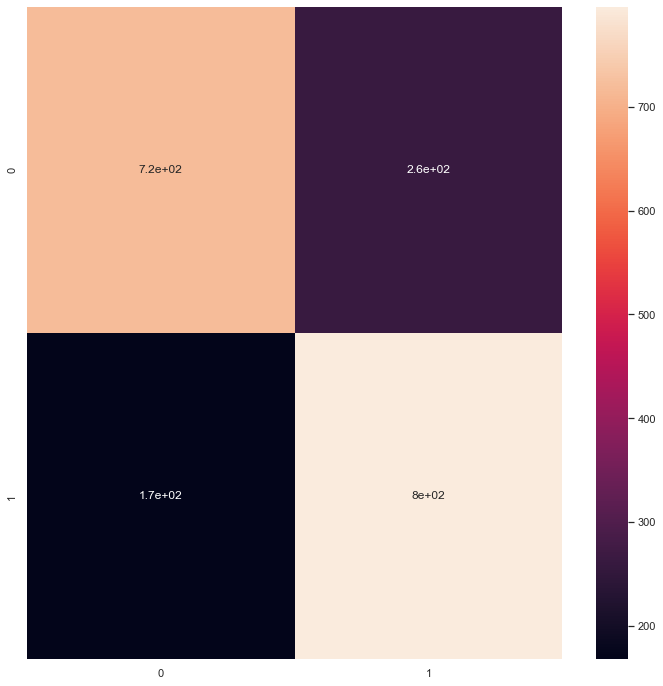

In [46]:
sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True)

### Above is the confusion matrix of our dataset

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

### We use random forest classifier for our dataset because 1 it is an ensemble learning algorithm which means it will generate many decision  tree from random subset of features using bootstraped dataset and will see the predictions of each decision tree and then generate output for a test tuple and 2 because it is helpful for categorical features not in the case of logistic regression 

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
predictions = rf.predict(X_test)

In [53]:
metrics.f1_score(y_test,predictions)

0.9204152249134948

In [54]:
from sklearn.metrics import roc_curve,auc

In [128]:
train_results = []
test_results = []

In [129]:
n_estimators = [1,2,4,8,16,32,64,128]
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator,random_state=42,criterion="entropy")
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
    

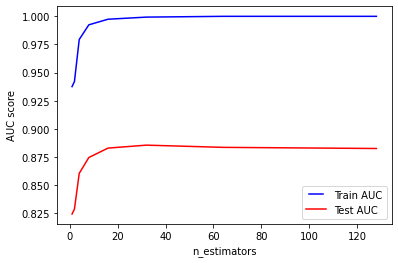

In [130]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [94]:

estimator = 16

In [55]:
randomf = RandomForestClassifier()

In [56]:
randomf.fit(X_train,y_train)

RandomForestClassifier()

### Hyper parameter tuning our model using randomized search cv

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 6)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [59]:
rf_random = RandomizedSearchCV(estimator = randomf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 43, 76, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 560, 920, 1280,
                                                         1640, 2000]},
                   random_state=42, verbose=2)

In [61]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=1280)

In [62]:
refinedrfclassifier = RandomForestClassifier(bootstrap=False, n_estimators=1280)

In [63]:
refinedrfclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=1280)

In [64]:
predictions = refinedrfclassifier.predict(X_test)

### Accuracy and more importantly f1 score of our dataset is reasonably good

In [65]:
metrics.f1_score(y_test,predictions)

0.9294647323661831

In [66]:
metrics.accuracy_score(y_test,predictions)

0.9275064267352185

<AxesSubplot:>

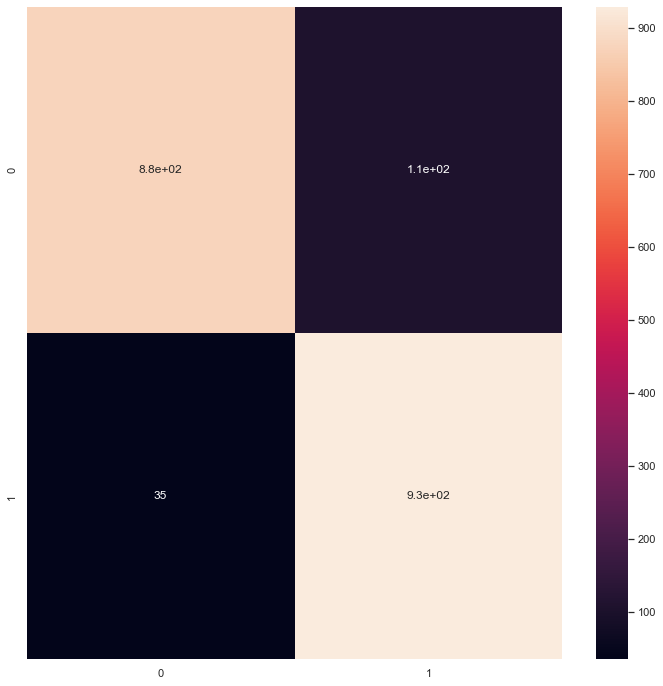

In [67]:
sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True)

### Here recall score is of importance and it's good that our recall is high because recall is ability of our model to find all the relevant cases within a dataset and our false negative should be low here because we want to tell an individual that according to our model your chances of heart stroke is high because of some features even if we are not so sure rather than telling a person with even slight symptoms the he/she doesn't have a chance of stroke so our recall is high which is good


In [68]:
metrics.recall_score(y_test,predictions)

0.9636929460580913

In [69]:
metrics.precision_score(y_test,predictions)

0.8975845410628019

### F1 score and accuracy of our validation dataset

In [70]:
cv_predictions = refinedrfclassifier.predict(X_val)

In [72]:
metrics.f1_score(y_val,cv_predictions)

0.9233038348082595

In [73]:
metrics.recall_score(y_val,cv_predictions)

0.9601226993865031

In [74]:
metrics.precision_score(y_val,cv_predictions)

0.8892045454545454

### Dumping our model in pickle file

In [75]:
import pickle

In [76]:
pickle.dump(refinedrfclassifier, open('myClassifier.pkl', 'wb'))

In [77]:
picklemodel = pickle.load(open('myClassifier.pkl', 'rb'))

In [80]:
y_pred_test = picklemodel.predict(X_test)

In [82]:
X_test['y_pred_test'] = y_pred_test.tolist()

In [83]:
X_test.to_csv('Predicted_model_csv.csv')